## Pandas II
> Groupby
    - SQL Groupby 명령어와 같음
    - split->apply->combine
    - 과정을 거쳐 연산함
    - 한개 이상의 column을 묶을 수 있음
    - group으로 묶여진 데이터를 matrix형태로 변환해줌
    - index level을 변경 할 수 있음
    - groupby에 의해 split 된 상태를 추출 가능함
        1. 추출된 group 정보에는 세가지 유형의 apply가 가능함
        2. Aggregation: 요약된 통계정보를 추출해줌
        3. Transformation: 해당 정보를 변환해줌
        4. Filtration: 특정 정보를 제거 하여 보여주는 필터링 기능

In [ ]:
df.groupby('team')['Points'].sum() # 묶음이 기준이 되는 컬럼 , 적용받는컬럼 , 적용받는 연산

In [6]:
import pandas as pd
data={
    'team':['riders','riders','devils','devils','kings','kings','kings','kings','riders','royals','royals','riders'],
    'rank':[1,2,2,3,3,4,1,1,2,4,1,2],
    'year':[2014,2015,2014,2015,2014,2016,2017,2016,2014,2015,2018,2019],
    'points':[123,324,123,53,234,123,523,123,325,123,123,123]
}
df=pd.DataFrame(data)
print(df.head())
print(df.describe())
df.groupby("team")['points'].std()

     team  rank  year  points
0  riders     1  2014     123
1  riders     2  2015     324
2  devils     2  2014     123
3  devils     3  2015      53
4   kings     3  2014     234
            rank         year      points
count  12.000000    12.000000   12.000000
mean    2.166667  2015.583333  193.333333
std     1.114641     1.676486  134.524302
min     1.000000  2014.000000   53.000000
25%     1.000000  2014.000000  123.000000
50%     2.000000  2015.000000  123.000000
75%     3.000000  2016.250000  256.500000
max     4.000000  2019.000000  523.000000


team
devils     49.497475
kings     188.892165
riders    116.336796
royals      0.000000
Name: points, dtype: float64

In [16]:
h_index= df.groupby(['team','year'])['points'].sum()
h_index.unstack()
h_index.reset_index()
h_index.sort_values()
h_index.sum(level=0)
grouped= df.groupby('team')
grouped

### Groupby- transformation
- 단 max나 min처럼 series 데이터에 적용되는 데이터들은 key값을 기준으로 grouped된 데이터 기준
- 특정 조건으로 데이터를 검색할 때 사용
- filter 안에는 boolean 조건이 존재해야함
- len(x)는 group된 dataframe 개수

In [19]:
score = lambda x : (x.max())
grouped.transform(score)

,rank,year,points
0,2,2019,325
1,2,2019,325
2,3,2015,123
3,3,2015,123
4,4,2017,523
5,4,2017,523
6,4,2017,523
7,4,2017,523
8,2,2019,325
9,4,2018,123


In [36]:
import wget
import os
from six.moves import urllib
!conda install --y wget
data_root='https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv'
Data_path=os.path.join('data','phone')## 현재의 위치에 디렉토리를 생성하는거지 
## 즉 ../data/phone 이라는 path를 생성하고 
def get_data(url=data_root,data_path=Data_path):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)## 여기를 톨해서 makedirs 디렉토리를 만든다 
    phone_data_path=os.path.join(data_path,'phone_data.csv')
    #phone_data가 있는 path는 기존에 만들었던 /data/phone에다가 새로 생길 파일인 phone_data.csv를 추가한다
    urllib.request.urlretrieve(url,phone_data_path)
    # 명령문을 통해서 url에 접근해서 data를 받고 phone_data_path로 가서 이제 파일을 연다 
def load_data(data_path=Data_path):
    csv_path=os.path.join(data_path,'phone_data.csv')
    #csv파일이 있는곳으로 이동 후 phnoe data를 읽는 과정 
    return pd.read_csv(csv_path)

get_data()## 파일 경로 생성및 파일 다운 
phone_data=load_data()# 다운된 파일 load 하기 
phone_data
    


PackagesNotFoundError: The following packages are not available from current channels:

  - wget

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [41]:
import dateutil
phone_data.dtypes
# 여기서 보면 알다시피 date는 object타입으로 되어있습니당 그럼 이걸 바꿔봅시다 
phone_data['date']=phone_data['date'].apply(dateutil.parser.parse,dayfirst=True)
phone_data.dtypes

TypeError: Parser must be a string or character stream, not Timestamp

<AxesSubplot:xlabel='month'>

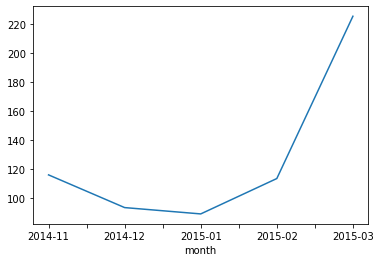

In [44]:
# 이걸 통해서 이제 달마다의 총통화시간량을 구할 수 가 있다.
phone_data.groupby('month')['duration'].sum()
phone_data.groupby('month')['duration'].mean().plot()


item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


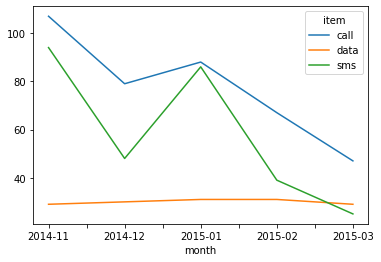

In [46]:
phone_data.groupby(['month','item'])['duration'].count().unstack().plot()
phone_data.groupby(['month','item'])['duration'].count().unstack()

### pivot Table
- 우리가 excel에서 보던 그것!
- index 축은 groupby 와 동일함
- cloumn에 추가로 labeling 값을 추가하여,value에 numeric type값을 aggreatation하는 형태

In [50]:
phone_data.pivot_table(['duration'],
                      index=[phone_data.month,phone_data.item],
                       columns=phone_data.network, aggfunc='sum',fill_value=0
                      )
# 또다른 방식
phone_data.groupby(['month','item','network'])['duration'].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

### CrossTab
### Merge and Concat
- SQL에서 많이 사용하는 Merge와 같은 기능
- 두 개의 데이터를 하나로 합침
- inner join, full join, left join,right join 

In [ ]:
pd.merge(df_a,df_b,on='subject_id')
- subject_id를 기준으로 merge 한다 그리고 on을 사용할 경우 양쪽에 전부 data가 있어야 한다.
- 두 dataframe이 컬림이 다를때 
pd.merge(df_a,df_b,left_on='subject_id',right_on='subject_id')
- 이런식으로 양쪽의 값을 다르게 측정하여 합칠 수 있다.

### database connection
- data loading 시 db connection 기능을 제공함